<a href="https://colab.research.google.com/github/GiovanniReguzzoni/modelliNLP/blob/main/analisiHateSpeech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import csv

In [ ]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8


In [ ]:
dftestl = pd.read_feather('/content/dftestlHSfea')

In [ ]:
dftest = pd.read_feather('/content/dftestfea')

In [ ]:
dftrain = pd.read_feather('/content/dftrainHSfea')

# Data analysis
 Exploratory Data Analysis(EDA)

In [ ]:
dftrain.sample(frac=1)

,text,hs
408,@user @user @user E i tunisini alla Marzuk dov...,0
2224,Campi rom: “Presto il piano per la chiusura”. ...,0
5296,Per i #cialtroni #PD e #UE 36 Euro al giorno p...,1
5854,@user Ho segnalato il tw come offensivo. Prima...,1
1634,Sarebbe diventato il presidente più amato di t...,0
...,...,...
773,Degrado capitale. Due nomadi si lavano in pien...,0
5388,"@user Luigi, ma se il reddito di cittadinanza ...",0
4692,@user @user Leggi razziali primo passo verso l...,0
5068,"CASTEL VOLTURNO: GLI IMMIGRATI MINACCIANO: "" S...",1


In [ ]:
dftrain.head()

,text,hs
0,"È terrorismo anche questo, per mettere in uno ...",0
1,@user @user infatti finché ci hanno guadagnato...,0
2,"Corriere: Tangenti, Mafia Capitale dimenticata...",0
3,"@user ad uno ad uno, perché quando i migranti ...",0
4,Il divertimento del giorno? Trovare i patrioti...,0


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6837 non-null   object
 1   hs      6837 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.0+ KB


In [ ]:
dftestl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   hs      500 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [ ]:
dftrain.shape

(6837, 2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


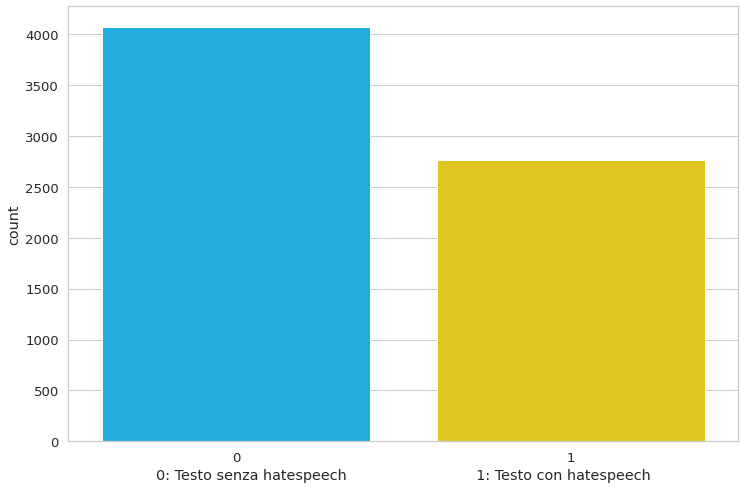

In [ ]:
sns.countplot(dftrain.hs)
plt.xlabel('0: Testo senza hatespeech                            1: Testo con hatespeech');

In [ ]:
contatoreHate=dftrain['hs'].value_counts()

print ("Totale testi analizzati: 6837")
print("No Hatespeech: ", contatoreHate[0])
print("Hatespeech: ", contatoreHate[1])

Totale testi analizzati: 6837
No Hatespeech:  4071
Hatespeech:  2766


In [ ]:
dftrain = dftrain.rename(columns={'text ': 'text'})


In [ ]:
import numpy

numpy.random.seed(0)



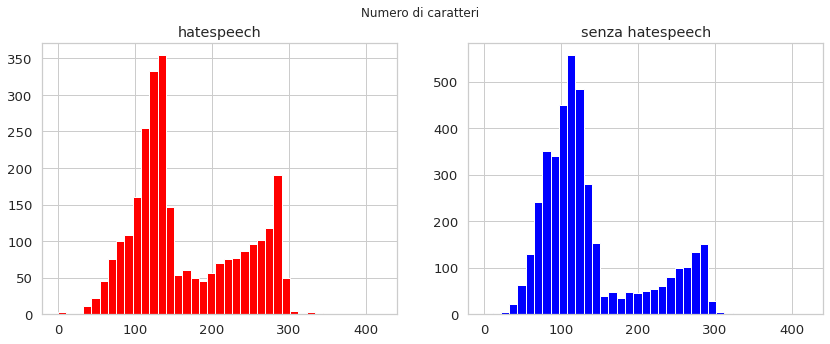

In [ ]:
#numero di caratteri in ogni messaggio

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5))

bins = np.linspace(0,420, 40)

testo_len=dftrain[dftrain['hs']==1]['text'].str.len()
ax1.hist(testo_len, bins, color='red')
ax1.set_title('hatespeech')

testo_len=dftrain[dftrain['hs']==0]['text'].str.len()
ax2.hist(testo_len, bins, color='blue')
ax2.set_title('senza hatespeech')
fig.suptitle('Numero di caratteri')
plt.show()


In [ ]:
dftrain.columns


Index(['text ', 'hs'], dtype='object')

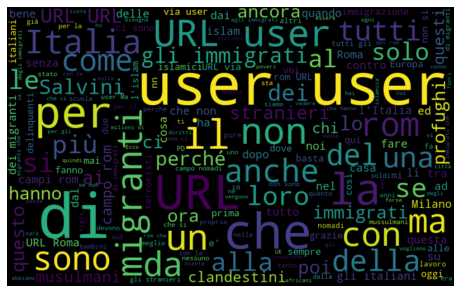

In [ ]:
#wordcloud testo senza hatespeech

all_words = ' '.join([text for text in dftrain['text ']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

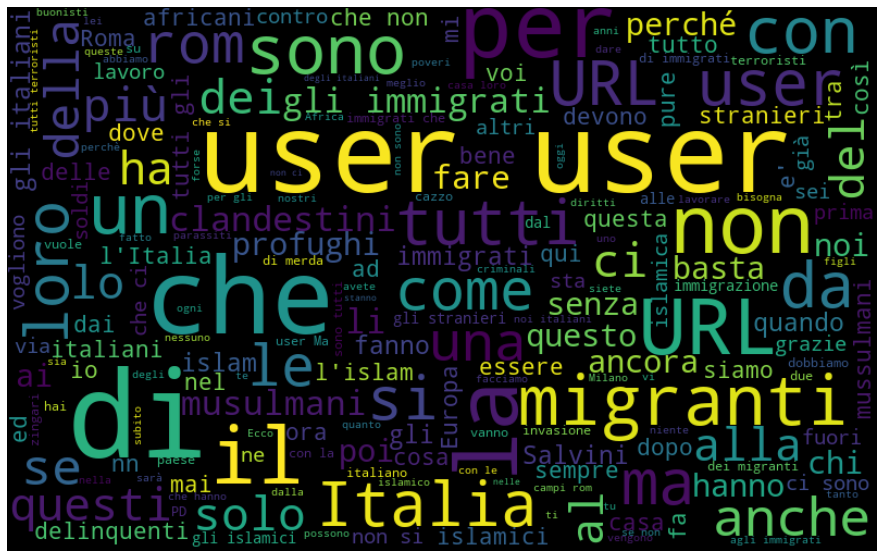

In [ ]:
#word cloud messaggi con hatespeech

all_words = ' '.join([text for text in dftrain['text'][dftrain['hs']==1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in dftrain[dftrain['hs']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords
stop=set(stopwords.words('italian'))

In [ ]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]

<BarContainer object of 20 artists>

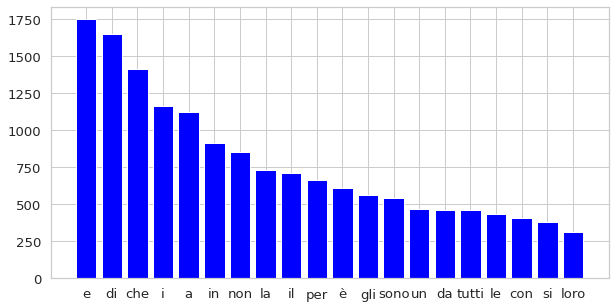

In [ ]:
#stop words tra testo senza hatespeech
fig, ax = plt.subplots(figsize=(10,5))

x,y=zip(*top)
plt.bar(x,y, color='blue')

<BarContainer object of 20 artists>

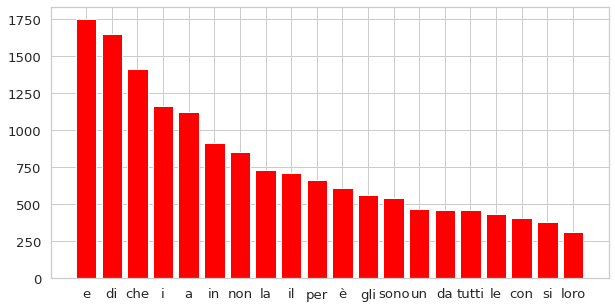

In [ ]:
#stop words tra testo con hatespeech


corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
    

fig, ax = plt.subplots(figsize=(10,5))

x,y=zip(*top)
plt.bar(x,y, color='red')



<BarContainer object of 19 artists>

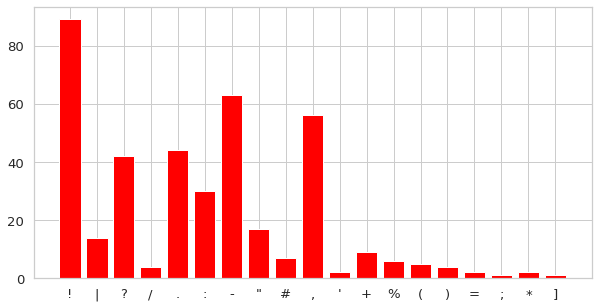

In [ ]:
#uso punteggiatura nei testi con hatespeech

plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y, color='red')

<BarContainer object of 21 artists>

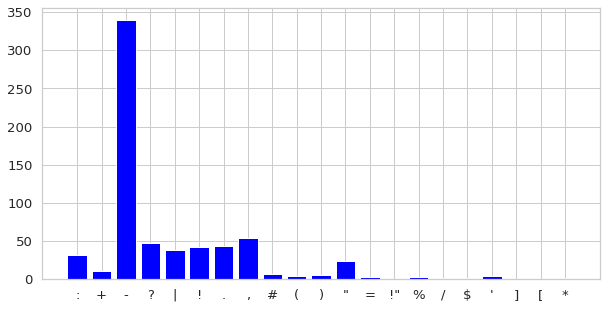

In [ ]:
#uso punteggiatura nei testi senza hatespeech


plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='blue')

Parole comuni

In [ ]:
from collections import  Counter

In [ ]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:85]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

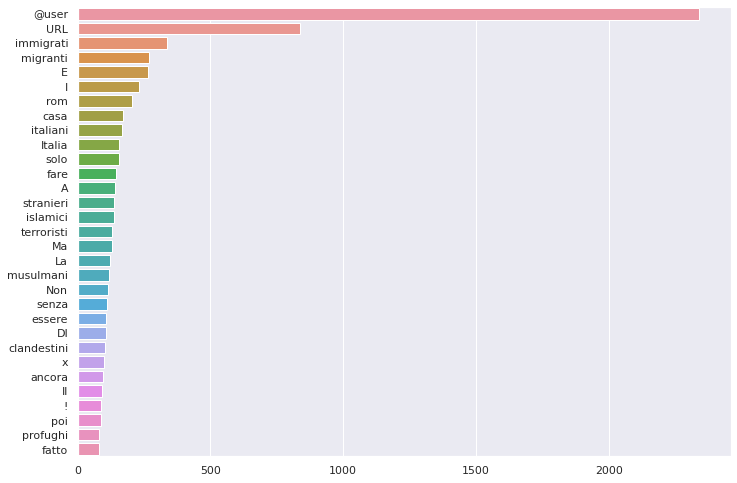

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.barplot(x=y,y=x)

In [ ]:
#Bigram

In [ ]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

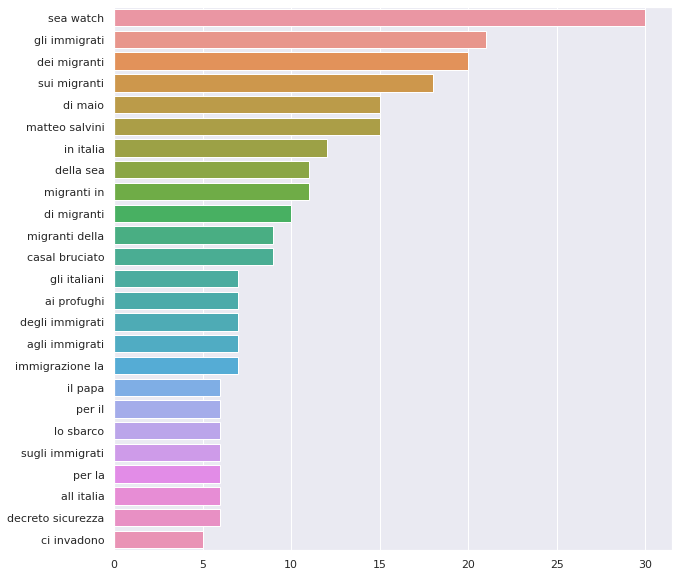

In [ ]:
plt.figure(figsize=(10,10))
top_tweet_bigrams=get_top_tweet_bigrams(dftest['text'])[:25]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
dftrain['temp_list1'] = dftrain['text'].apply(lambda x:str(x).split()) #List of words in every row for text

In [ ]:
top = Counter([item for sublist in dftrain['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,di,3919
2,e,3667
3,URL,3503
4,che,2751
5,a,2515
6,i,2470
7,in,2052
8,la,1798
9,il,1779
10,non,1693


# Data cleaning

In [ ]:
def cleaning (testo):
    
    # elimina dal testo punteggiatura, link html, 
    testo = re.sub('\[.*?\]', '', testo)
    testo = re.sub('https?://\S+|www\.\S+', '', testo)
    testo = re.sub('<.*?>+', '', testo)
    testo = re.sub('[%s]' % re.escape(string.punctuation), '', testo)
    testo = re.sub('\n', '', testo)
    testo = re.sub('\w*\d\w*', '', testo)

    # elimina parole ricorrenti - scelta del data analysis
    testo = re.sub('@user', '', testo)
    testo = re.sub('URL', '', testo)
    testo = re.sub('user', '', testo)
    testo = re.sub('url', '', testo)


    # in minuscolo tutte le lettere
    testo = testo.lower()

    return testo

In [ ]:
dftrain['text'] = dftrain['text'].apply(lambda x: cleaning(x))
dftestl['text'] = dftestl['text'].apply(lambda x: cleaning(x))


In [ ]:
dftrain.head()

,text,hs,testoStem
0,"[È, , t, r, r, r, s, m, , n, h, , q, u, s, ...",0,"[è, , t, r, r, r, s, m, , n, h, , q, u, s, ..."
1,"[@, u, s, r, , @, u, s, r, , n, f, t, t, , ...",0,"[@, u, s, r, , @, u, s, r, , n, f, t, t, , ..."
2,"[C, r, r, r, :, , T, n, g, n, t, ,, , M, f, ...",0,"[c, r, r, r, :, , t, n, g, n, t, ,, , m, f, ..."
3,"[@, u, s, r, , d, , u, n, , d, , u, n, ,, ...",0,"[@, u, s, r, , d, , u, n, , d, , u, n, ,, ..."
4,"[I, , d, v, r, t, m, n, t, , d, , g, r, n, ...",0,"[i, , d, v, r, t, m, n, t, , d, , g, r, n, ..."
